Index(['CensusTract', 'percentEBLL2020', 'note2020', 'percentEBLL2019',
       'note2019', 'percentEBLL2018', 'note2018', 'percentEBLL2017',
       'note2017', 'percentEBLL2016', 'note2016', 'percentEBLL2015',
       'note2015', 'percentEBLL15_20', 'note15_20'],
      dtype='object')

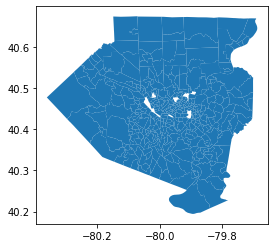

In [1]:
import pandas as pd
import numpy as np
import geopandas as gdp
%matplotlib inline
import matplotlib.pyplot as plt

blood_lead_levels = pd.read_csv("wprdc_ebll.csv")
lead_levels = gdp.read_file("EBLL_CT15_19.shp")
pd.options.display.max_columns = None

lead_levels.plot()
blood_lead_levels.columns

This is the initial graph generated using geopandas and the shp file for the chosen dataset.

**Census Tract Blood Lead Level Test Results Visualized**
<br>The shp file contains geographical data, which is useful to then use geopandas to graph.

<br> *Only using results from 2019 and 2020 since they are the most recent values:*

In [2]:
data = blood_lead_levels.drop(['note2020', 'note2019','note2018','note2017','note2016','note2015', 'note15_20'], axis = 1 )

The columns that give a note for the EBLL values for each years is removed.

In [3]:
updated_values = data.sort_values(by = 'percentEBLL15_20', ascending = False)
important_info = updated_values.head(25)
important_info

,CensusTract,percentEBLL2020,percentEBLL2019,percentEBLL2018,percentEBLL2017,percentEBLL2016,percentEBLL2015,percentEBLL15_20
363,42003561200,NaN,NaN,NaN,NaN,NaN,NaN,15.79
349,42003550900,NaN,19.23,NaN,NaN,NaN,NaN,14.77
103,42003300100,11.54,11.22,15.12,16.46,21.33,12.63,14.17
356,42003552300,NaN,NaN,8.86,7.55,7.27,NaN,12.99
42,42003120700,NaN,NaN,NaN,NaN,NaN,NaN,12.20
90,42003261400,NaN,10.91,10.71,NaN,NaN,NaN,11.82
353,42003552000,NaN,11.59,13.92,12.36,NaN,NaN,11.76
91,42003261500,NaN,NaN,NaN,NaN,NaN,NaN,11.28
361,42003561000,NaN,18.00,NaN,NaN,NaN,NaN,11.04
306,42003512800,NaN,NaN,NaN,NaN,NaN,NaN,10.84


42003561200 = Wilkinsburg, PA <br>
42003550900 = McKeesport, PA <br>
42003300100 = Knocksville, PA <br>
42003552300 = McKeesport, PA <br>
42003120700 = Homewood West <br>
42003261400 = Perry South <br>
42003552000 = McKeesport <br>
42003261500 = Perrysville, PA/Ross Township <br>
42003561000 = Wilkinsburg, PA <br>
42003512800 = North Braddock <br>
42003271500 = Marshall-Shadeland(Woods Run) <br>
42003130200 = Homewood North <br>
42003270300 = Brighton Heights <br>
42003241200 = Spring Garden <br>
42003250300 = Mexican War Streets/Northside <br>
42003010300 = Bluff(Uptown) <br>
42003260700 = Perry North <br>
42003120400 = Larimer <br>
42003562500 = Esplen/Sheriden <br>
42003111400 = Garfield <br>
42003561700 = St. Clair <br>
42003180300 = Allentown <br>
42003130400 = Homewood South <br>
42003562400 = Beltzhoover/Bon Air <br>
42003508000 = Wilmerding <br>

After ordering the values from greatest to least, the neighborhoods were converted from geoid to a physical location.

In [4]:
wilkinsburg_average = (15.79 + 11.04)/2
mckeesport_average = (14.77 + 12.99 + 11.76)/3
print(wilkinsburg_average)
print(mckeesport_average)

13.415
13.173333333333332


Since Wilkinsburg and McKeesport appear multiple times in the daya, the average is calculated for the final graph.

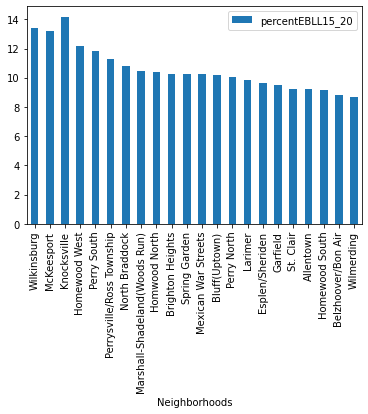

In [5]:
final_ebll = pd.DataFrame({'Neighborhoods': ['Wilkinsburg','McKeesport', 'Knocksville', 'Homewood West', 'Perry South',
                                            'Perrysville/Ross Township', 'North Braddock', 'Marshall-Shadeland(Woods Run)',
                                            'Homwood North', 'Brighton Heights', 'Spring Garden', 'Mexican War Streets',
                                             'Bluff(Uptown)', 'Perry North', 'Larimer', 'Esplen/Sheriden','Garfield','St. Clair'
                                             , 'Allentown', 'Homewood South', 'Belzhoover/Bon Air', 'Wilmerding'],
                          'percentEBLL15_20': [13.42,13.17, 14.17, 12.20, 11.82, 11.28,10.84,10.45,10.37,
                                              10.29, 10.29,10.26, 10.20,10.06,9.84, 9.62, 9.52, 9.26,
                                              9.25, 9.15, 8.85, 8.70]})
final_ebll.plot.bar(x = 'Neighborhoods', y = 'percentEBLL15_20')

**Analysis and Summary of Data**
<br> Overall, the neighborhoods in Pittsburgh and surrounding area that have the highest blood lead levels are either in lower income areas or are in North Side Pittsburgh. Multiple Census Tract numbers that are traceable to Wilkinsburg and McKeesport have a larger recorded percentage of blood lead levels. However, the neighborhood that has the overall highest blood lead level in Knocksville, which has a average percentage of blood lead levels from 2015 to 2020. 